In [1]:
from os import path 

from keras.layers import Input
from keras.models import Model

import numpy as np

import blusky.datasets as datasets
from blusky.transforms.apply_father_wavelet_2d import ApplyFatherWavlet2D
from blusky.transforms.cascade_2d import Cascade2D
from blusky.transforms.cascade_tree import CascadeTree
from blusky.transforms.default_decimation import DefaultDecimation
from blusky.utils.pad_2d import Pad2D, pad_to_log2
from blusky.wavelets.wavelet_factories_2d import vanilla_gabor_2d, vanilla_morlet_2d

Using TensorFlow backend.


In [37]:
test_file_1 = path.join(
    path.dirname(datasets.__file__), "twod_image_1.npy")

original_image = np.load(test_file_1)
original_shape = original_image.shape

img = pad_to_log2(original_image)
img = np.expand_dims(img, axis=-1)

dh = img.shape[0] - original_shape[0]
dw = img.shape[1] - original_shape[1]

In [137]:
# Don't make this too huge for brevity.
J = 3
# 0 = no overlap etc.
overlap_log_2 = 3
# apply to all available orders
order = J
# Should be one or more to avoid aliasing, if you want overlapping tiles, 
# this can increase too.
oversampling = 2 

angles=(0.0, 45., 90., 135.)


# details of the input data
img_size = img.shape
sample_rate = 0.004*3

# vanilla filter bank
wavelets = [vanilla_morlet_2d(sample_rate, j=i) for i in range(0,J+1)]
father_wavelet = vanilla_gabor_2d(sample_rate, j=J)
print (father_wavelet.kernel(0.).shape)
# method of decimation
deci = DefaultDecimation(oversampling=oversampling)

# input
inp = Input(shape=img.shape)

# valid padding
cascade2d = Cascade2D("none", 
                    0, 
                    decimation=deci,
                    angles=angles)

# Pad the input
pad_2d = Pad2D(wavelets, decimation=deci)
padded = pad_2d.pad(inp)

# Apply cascade with successive decimation
cascade_tree = CascadeTree(padded, order=order)
cascade_tree.generate(wavelets, cascade2d._convolve)
convs = cascade_tree.get_convolutions()

# Create layers to remove padding
cascade_tree = CascadeTree(padded, order=order)
cascade_tree.generate(wavelets, pad_2d._unpad_same)
unpad = cascade_tree.get_convolutions()

# Remove the padding
unpadded_convs = [i[1](i[0]) for i in zip(convs, unpad)]

# Complete the scattering transform with the father wavelet
apply_conv = ApplyFatherWavlet2D(J=J, overlap_log_2=overlap_log_2, 
                              img_size=img.shape, sample_rate=sample_rate,
                              wavelet=father_wavelet)

sca_transf = apply_conv.convolve(unpadded_convs)

(31, 31)


In [138]:
model = Model(inputs=inp, outputs=sca_transf)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 256, 512, 1)  0                                            
__________________________________________________________________________________________________
reflection_padding2d_11 (Reflec (None, 320, 576, 1)  0           input_11[0][0]                   
__________________________________________________________________________________________________
depthwise_conv2d_285 (Depthwise (None, 320, 576, 4)  200         reflection_padding2d_11[0][0]    
__________________________________________________________________________________________________
depthwise_conv2d_286 (Depthwise (None, 320, 576, 4)  200         reflection_padding2d_11[0][0]    
__________________________________________________________________________________________________
depthwise_

In [139]:
result = model.predict(np.expand_dims(img, axis=0))

In [140]:
from cv2 import resize
import matplotlib.pylab as plt

dh2 = dh//2
dw2 = dw//2

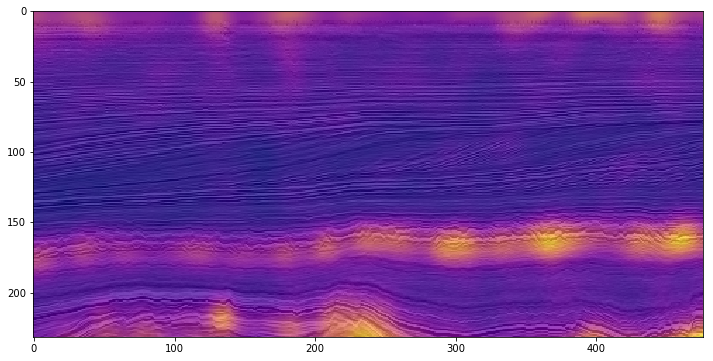

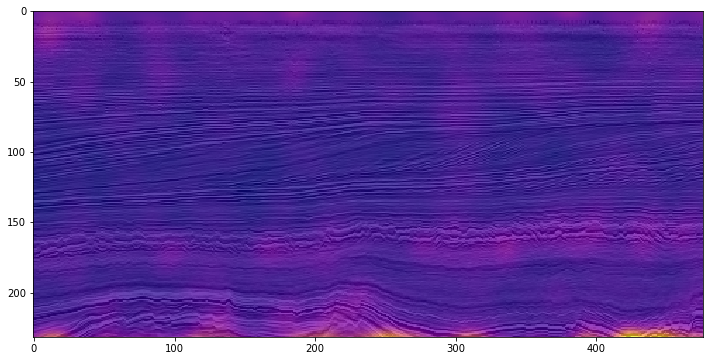

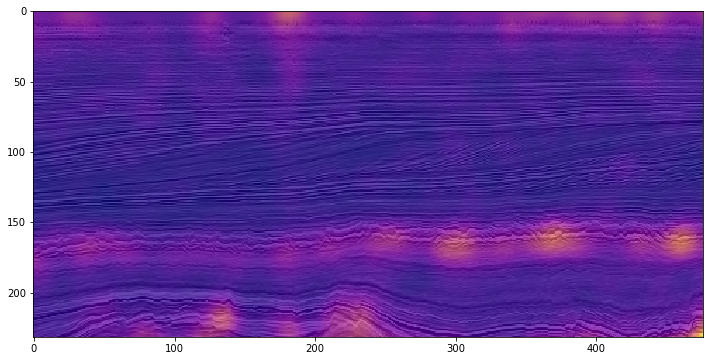

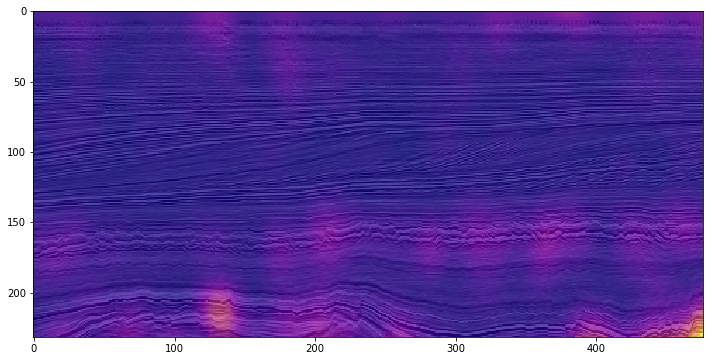

In [145]:
_img = resize(result[0][0,:,:,0], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()

_img = resize(result[2][0,:,:,0], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()

_img = resize(result[4][0,:,:,0], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()


_img = resize(result[6][0,:,:,0], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()


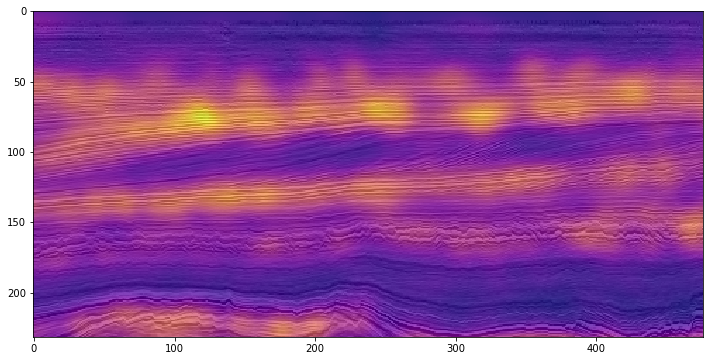

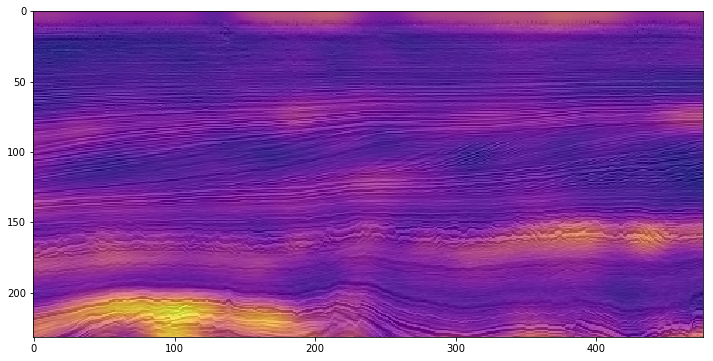

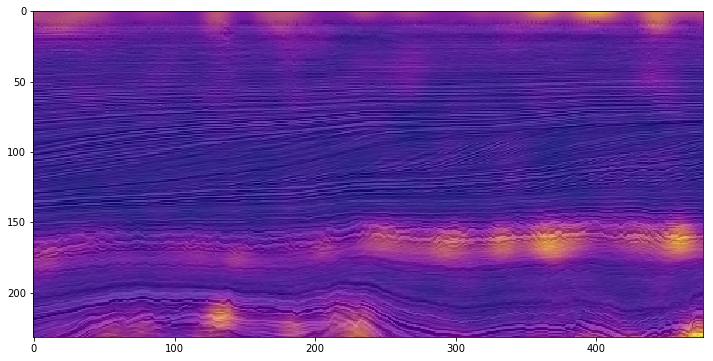

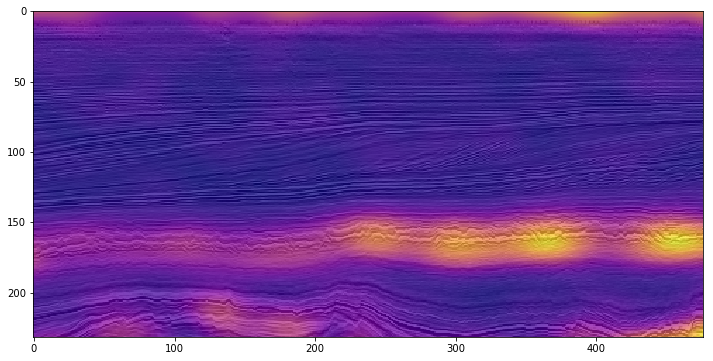

In [146]:
_img = resize(result[0][0,:,:,2], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()

_img = resize(result[2][0,:,:,2], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()

_img = resize(result[4][0,:,:,2], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()


_img = resize(result[6][0,:,:,2], (img.shape[1], img.shape[0]))
plt.figure(figsize=(12,6))
plt.imshow(img[dh2:-dh2,dw2:-dw2,0], cmap='gray', vmin=-2.0*np.std(img), vmax=2.0*np.std(img))
plt.imshow(_img[dh2:-dh2,dw2:-dw2], alpha=0.75, cmap='plasma')
plt.show()
